**1. Load the data as a Pandas data frame and ensure that it imported correctly.**

In [49]:
# import required librries
import numpy as np
import pandas as pd

In [50]:
# reading the csv file and saving to a variable
df = pd.read_csv("auto-mpg.csv")

In [51]:
# reviewing shape of dataframe 
df.shape

(398, 9)

In [52]:
# viewing first 5 rows of dataframe
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [53]:
# viewing statistics using decribe() function
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**2. Begin by prepping the data for modeling:**

**Remove the car name column.**

In [54]:
# I was uanble to remove the 'car name' as it was, I'm guessing I was not handling the space in the name correctly so I renamed the original column
df.rename(columns = {'car name':'car_name'}, inplace = True)

In [55]:
# dropping the re-named column 
df.drop(['car_name'], axis = 1, inplace = True)

In [56]:
# checking the first 5 rown of the dataframe to verify the column was dropped
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.**

In [57]:
# checking data types of columns 
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [58]:
# checking for null or NaN values
df['horsepower'].isnull().values.any()

False

In [59]:
# checking the string values
df[~df['horsepower'].str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [60]:
# droping the string '?' values from the column 'horsepower' and saving to a variable
df2 = df[df.horsepower != '?']
# converting the remaing values in the 'horsepower' column to numeric
df2['horsepower'] = pd.to_numeric(df2['horsepower'])

C:\Users\rbrio\AppData\Local\Temp\ipykernel_32740\1076896480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['horsepower'] = pd.to_numeric(df2['horsepower'])


In [61]:
# calculating the mean of the column 'horsepower'
hp_m = df2.loc[:, 'horsepower'].mean()
hp_m

104.46938775510205

In [62]:
# using apply and lamda to convert the '?' values in the orginal dataframe to the mean of the 'horsepower' column
df['horsepower'] = df['horsepower'].apply(lambda x: hp_m if x == '?' else x)

In [63]:
# verify the column 'horsepwoer' is all numeric
pd.to_numeric(df['horsepower']).notnull().all()

True

**Create dummy variables for the origin column.**

In [64]:
# attempting to use the get_dummies function
pd.get_dummies(df['origin'])

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


Since the 'origin' column is alraedy a numeric categorical column I was unsure of how to implement the get_dummies() function since the textbook didn't have an example of this. It seems since we did not need this column for future use it may have made sense to simply drop it. 

**Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?**

In [65]:
# using the corrM() function to creat a coefficient matrix
corrM = df.corr()
corrM

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


The feature with the highest correlation to 'mpg' would be 'weight' at -0.83. This indicates a strong negative correlation. Which seems to make sense when a basic understadning of vehicles. 

**Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.**

In [66]:
import matplotlib.pyplot as plt

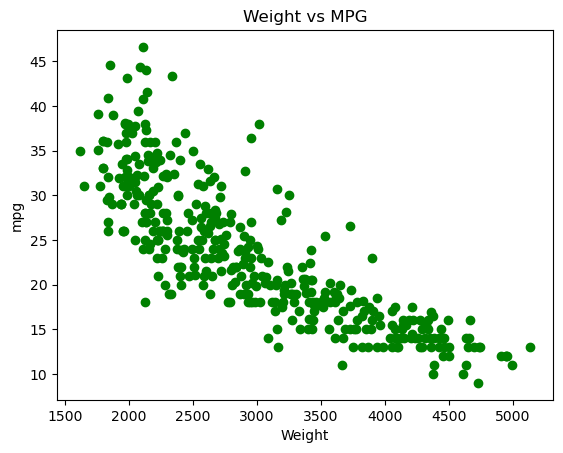

In [67]:
# using the scatter() function to plot a scatter plot of the weight vs mpg
plt.scatter(df['weight'], df['mpg'], c='green')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.title('Weight vs MPG')
plt.show()

With the correlation coefficent being -0.83, the scatterplot of the two variables reflects it with a stong negative correlation. As the 'weight' value increase the 'mpg' value decreases. 

**Randomly split the data into 80% training data and 20% test data, where your target is mpg.**

In [68]:
# import additional tools 
from sklearn.model_selection import train_test_split

In [69]:
# splitting the selected columns for linear regression into 'train' and 'test' groups.
x_train, x_test, y_train, y_test = train_test_split(df['weight'],df['mpg'], test_size=0.2,random_state=101)

In [70]:
# reshaping the data, I completed this after recieving an error when trying to run the linear regression
x_train = x_train.array.reshape(-1, 1)
x_test = x_test.array.reshape(-1, 1)

**Train an ordinary linear regression on the training data.**

In [71]:
# importing additional tools 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [72]:
# creating the linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [73]:
# Prediction results for calculating validation metrtics later
y_pred_train = lm.predict(x_train) # predicted value of y_train
y_pred_test = lm.predict(x_test) # predicted value of y_test

**Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.**

In [74]:
# importing additional tools
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae 
from math import sqrt

In [75]:
# I could have used the variables from above, but in an attempt to better understand
# the process I used the predcit function within the r2_score function
r_squared_test = r2_score(y_test, lm.predict(x_test))
r_squared_test

0.7138783767242333

In [76]:
r_squared_train = r2_score(y_train, lm.predict(x_train))
r_squared_train

0.6854142523405227

Interpretation: The r-squared value of the test variables is 0.714 while the training values calculated to 0.685. The closer to one the r-squared value is the better fit the model is. 

In [77]:
# setting squared to False will return the RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_train

4.400728754617213

In [78]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_test

4.069268820143531

Interpretation: RMSE gives the average distance between the predicted vlaues and actual values from the data set. The lower the RMSE the shoter the distance of predicted from actual. This would indicate a good model. The test rmse calculated at 4.07 while the training calcualted at 4.40. The test RMSE is lower indicating a better fit. 

In [79]:
mae_test = mae(y_test, y_pred_test)
mae_test

2.931714129660368

In [80]:
mae_train = mae(y_train, y_pred_train)
mae_train

3.398834887483626

Interpretation: MAE measures the average absolute difference between the predicted values and the actual target values. This is useful to understand the magnitude of errors regardless of them being overestimators or underestimators. The smaller the MAE value the smaller the absolute difference between the predicted and actual values. The MAE value for the test variables calculated to be 2.932 while the train variables calcualted to be 3.399. The test variables having the smaller MAE is an indication of a better model fit. 

**Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.**

In [81]:
# importing additonal tools
from sklearn.linear_model import Ridge

In [82]:
# splitting the data again
x_ridge_train, x_ridge_test, y_ridge_train, y_ridge_test = train_test_split(df['weight'],df['mpg'], test_size=0.2,random_state=101)

In [83]:
# reshaping the data agin
x_ridge_train = x_ridge_train.array.reshape(-1, 1)
x_ridge_test = x_ridge_test.array.reshape(-1, 1)

In [84]:
# generating the Ridge Regression model
ridge_reg = Ridge(alpha=3)  # alpha is the hyperparameter equivalent to lambda

The hyperparameter controls the strength of the penalty applied to the model coefficients. The penalties are refered to as L1 and L2. L1 regularizes the coefficients while L2 reduces them. This essentially reduces the coeffecients influence on the model. 

In [85]:
# applying the ridge regression model
ridge_reg.fit(x_ridge_train, y_ridge_train)

Ridge(alpha=3)

In [86]:
y_ridge_pred_train = ridge_reg.predict(x_ridge_train) # predicted value of y_train
y_ridge_pred_test = ridge_reg.predict(x_ridge_test) # predicted value of y_test

In [87]:
r_squared_ridge_test = r2_score(y_ridge_test, y_ridge_pred_test)
r_squared_ridge_test

0.7138783765750275

In [88]:
r_squared_ridge_train = r2_score(y_ridge_train, y_ridge_pred_train)
r_squared_ridge_train

0.6854142523405224

In [89]:
# setting squared to False will return the RMSE
rmse_ridge_train = mean_squared_error(y_ridge_train, y_ridge_pred_train, squared=False)
rmse_ridge_train

4.400728754617214

In [90]:
mae_ridge_test = mae(y_ridge_test, y_ridge_pred_test)
mae_ridge_test

2.931714122595946

In [91]:
mae_ridge_train = mae(y_ridge_train, y_ridge_pred_train)
mae_ridge_train

3.3988348798686943

Using the Ridge Regression model all values for R-Squared, RMSE, and MAE were identicalto the linear regression model. This, in my opinion. is an indication that I must have not performed the Ridge Regression model correctly. I would expect different values since I even split the test and train data randomly again. At this time I am unsure of exactly where I went wrong, there is also the possibilty that I performed the linear regression model incorrectly. I hope to receive some additonal feedback once this is graded as I would like to learn from my mistakes on this one. 